In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(0)  # para que los resultados sean reproducibles

#  Redes Neuronales Convolucionales (CNN, *Convolutional Neural Networks*)

![Redes Neuronales](images/cnn.png)

## Análisis de imágenes con MLP

- No aprovecha la estructura espacial de la imagen
- Gran cantidad de parámetros
- No es invariante a traslaciones
- Alto costo computacional
- Peor rendimiento general comparadas contra las CNNs


**No aprovecha la estructura espacial de la imagen**

Las imágenes tienen una estructura 2D, y los píxeles vecinos suelen estar correlacionados.

Un MLP requiere que conviertas la imagen en un vector 1D (aplanar la imagen), lo cual destruye la información espacial.

Esto significa que el MLP no distingue entre píxeles que están juntos o separados, lo cual es un problema serio para tareas como detección de bordes, formas, o patrones locales.

**Gran cantidad de parámetros**

En MLPs, el número de neuronas y conexiones crece exponencialmente con el tamaño de la imagen de entrada. 

Por ejemplo, si tenemos una imagen de 64x64 píxeles entonces la capa de entrada tendrá 4096 neuronas. Si esta capa se conecta con una capa oculta de 1024 neuronas, se tendrán de entrada ~4 millones de pesos a entrenar.

Esto genera modelos:

- Enormemente grandes

- Difíciles de entrenar

- Con riesgo muy alto de overfitting

**No es invariante a traslaciones**

Si una figura se mueve ligeramente en la imagen (por ejemplo, un gato pasa del centro a la esquina), un MLP no generaliza bien porque no aprende patrones locales repetibles.

**Alto costo computacional**

Debido al gran número de conexiones, entrenar un MLP con imágenes medianamente grandes se vuelve computacionalmente costoso, tanto en tiempo como en memoria.

**Peor rendimiento general**

En tareas reales como clasificación de imágenes, los MLPs tienden a obtener resultados peores que las CNNs, porque no pueden capturar bien las características visuales complejas.


## Orígenes de las CNNs

Seminal paper: [**"Receptive fields, binocular interaction and functional architecture in the cat's visual cortex"**][cita], David Hubel y Torsten Wiesel (1962)

 - Exploraron cómo el cerebro (de los gatos) procesa la información visual.

 - Registraron la actividad eléctrica de neuronas individuales en el cerebro de gatos mientras les mostraban patrones visuales simples, como líneas y bordes.

 - Analizaron cómo respondían estas neuronas a diferentes estímulos (por ejemplo, líneas en diferentes orientaciones, movimientos, ojos).

 - Descubrieron patrones sistemáticos en cómo estas neuronas estaban organizadas y cómo se especializaban en ciertas tareas visuales.

[cita]:  https://physoc.onlinelibrary.wiley.com/doi/10.1113/jphysiol.1962.sp006837

- Les valió el Premio Nobel de Medicina en 1981.

- Sentó las bases de la neurociencia visual moderna y de muchas técnicas actuales en visión artificial y reconocimiento de imágenes.

*¿Qué descubrieron?*

1. Campos receptivos
Cada neurona en la corteza visual responde a una pequeña región del campo visual. Esa región se llama su campo receptivo.

Las neuronas no respondían a puntos de luz, sino a líneas y bordes en ciertas orientaciones. Por ejemplo, una neurona podía activarse solo con una línea vertical pero no con una horizontal.

2. Neuronas simples y complejas
Neuronas simples: responden a líneas específicas en ubicaciones específicas.

Neuronas complejas: también responden a orientaciones, pero no dependen tanto de la ubicación exacta — incluso pueden detectar movimiento.

3. Organización en columnas
Las neuronas en la corteza están organizadas en columnas, donde todas las neuronas dentro de una columna responden a la misma orientación de línea.

También encontraron columnas de dominancia ocular: algunas neuronas responden más a un ojo que al otro.

*¿Por qué es importante esto?*

Primera evidencia clara de que la percepción visual se construye paso a paso, desde elementos simples (líneas) hacia formas más complejas.

Mostró que el cerebro no es un "receptor pasivo", sino que tiene una arquitectura activa y organizada.

Inspiró redes neuronales artificiales, en especial las convolutional neural networks (CNNs), que también detectan primero bordes y luego formas más complejas.

*Relación con visión por computadora*

Hoy en día, cuando entrenamos una red neuronal para reconocer objetos en imágenes, el sistema imita esta jerarquía: primero detecta líneas, luego esquinas, luego formas.

*¿Qué es un campo receptivo?*

En neurociencia, el campo receptivo es la región del campo visual donde un estímulo provoca una respuesta en una neurona específica.

En redes neuronales convolucionales (CNN), el concepto es similar: cada unidad (o neurona artificial) en una capa convolucional “ve” una parte de la imagen de entrada. Esa parte es su campo receptivo.

Ejemplo visual paso a paso: imaginemos una imagen de entrada de tamaño 32x32 píxeles y una red neuronal convolucional con estas capas:

1. Primera capa convolucional

    - Filtros de 3x3
    - Padding = 1 (para mantener el tamaño)
    - Stride = 1

    Cada unidad en la primera capa "ve" un área de 3x3 píxeles de la imagen original → campo receptivo = 3x3.

2. Segunda capa convolucional

    - Filtros de 3x3
    - Padding = 1 (para mantener el tamaño)
    - Stride = 1

    Ahora, cada unidad de esta segunda capa recibe datos de una región 3x3 de la primera capa, pero esa región ya representa 3x3 píxeles del original.

    Entonces, el campo receptivo crece: ahora es de 5x5 píxeles respecto a la imagen original.

3. A medida que profundizamos más...

    El campo receptivo sigue creciendo en cada capa.

    En capas profundas, una sola neurona puede “ver” una gran parte de la imagen o incluso toda.



### Primer paper utilizando una CNN

<table>
<tr>
<td>

<img align="left" src="images/first_cnn.png" alt="First CNN" width="2000" style="padding-left:0px">
    
</td>
<td>

Este trabajo presentó por primera vez una red convolucional entrenada con *backpropagation* para reconocimiento de dígitos manuscritos, utilizando datos de códigos postales del servicio postal estadounidense.

- Introducción de capas convolucionales, submuestreo (pooling) y capas totalmente conectadas en una sola arquitectura.

- Entrenamiento *end-to-end* usando *backpropagation* del error.

- Prueba de que estas redes podían superar técnicas tradicionales en tareas de visión por computadora.

</td>
</tr>
</table>

## ¿Qué es una convolución de señales?: convoluciones 1D

En análisis de señales, una convolución de funciones puede sintetizarse como el filtrado de una señal mediante una función de filtro (*kernel*), y se expresa matemáticamente como (versión continua): 

$$
(f * g)(t) = \int_{-\infty}^{\infty} f(t - \tau) \cdot g(\tau) d\tau
$$

Imaginemos que tenemos una señal unidimensional, y para poner en concreto pensemos en una onda de audio. Esa señal es una serie de números que varía en el tiempo, algo así como una onda.
Ahora, supongamos que queremos modificar esa señal, por ejemplo para:

- Eliminar ruido,

- Resaltar ciertos sonidos,

- Simular un eco o un efecto de ambiente.

Para realizar esta operación utilizamos la **convolución de señales**. Esta es una operación matemática que nos permite combinar dos señales:

- La señal original

- Una función especial llamada "filtro" (*kernel*, en inglés), que define cómo queremos transformar la señal original.

El resultado de la convolución es una nueva señal, la cual es un filtrado de la señal original mediante el filtro que hayamos elegido.

### Convolución discreta en 1D

<table>
<tr>
<td>

La convolución de una señal \( x[n] \) con un filtro \( h[n] \) se define como:

$$
y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n - k]
$$

En la práctica (para señales finitas), se usa:

$$
y[n] = \sum_{k=0}^{K-1} x[k] \cdot h[n - k]
$$

</td>
<td>

<img align="left" src="images/filtro_1D.png" alt="Filtro 1D" width="1000" style="padding-left:100px">


</td>
</tr>
</table>

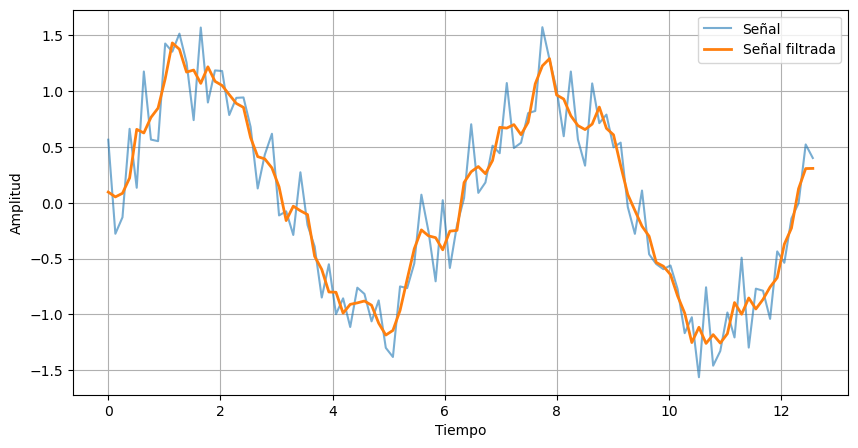

In [8]:
# Generar una señal de ejemplo: seno + ruido
x = np.linspace(0, 4 * np.pi, 100)
noisy_signal = np.sin(x) + np.random.normal(0, 0.3, size=x.size)

# Crear un filtro simple de promedio (media móvil)
kernel_size = 3
kernel = np.ones(kernel_size) / kernel_size

# Aplicar la convolución
smoothed_signal = np.convolve(noisy_signal, kernel, mode='same')

# Mostrar el resultado
plt.figure(figsize=(10, 5))
plt.plot(x, noisy_signal, label='Señal', alpha=0.6)
plt.plot(x, smoothed_signal, label='Señal filtrada', linewidth=2)
plt.xlabel('Tiempo'); plt.ylabel('Amplitud')
plt.legend(); plt.grid(True)

## Convoluciones 2D

Supongamos que tenemos una imagen en escala de grises representada por una matriz $I \in \mathbb{R}^{n \times n}$, y que tenemos además un filtro de tamaño $K \in \mathbb{R}^{(2k+1) \times (2k+1)}$ 


$$
G[i,j] = \sum_{l=-k}^{k} \sum_{m=-k}^{k}  K[l,m] \cdot I[i+l, j+m]
$$


<table>
<tr>
<td>

<img align="left" src="images/filtro_2D.png" alt="Filtro 2D" width="1000" style="padding-left:100px">

</td>
<td>

$\begin{align} 
&(-1*3) + (0*0) + (1*1) + \\ 
&(-2*2) + (0*6) + (2*2) +\\ 
&(-1*2) + (0*4) + (1*1) = -3 
\end{align}$
</td>
</tr>
</table>

### Algunas cuestiones a tener en cuenta

- Stride
- Padding
- Entrada
- Tamaño del filtro
- Salida

![Redes Neuronales](images/stride-1_padding-0.png)

![Redes Neuronales](images/stride-2_padding-0.png)

![Redes Neuronales](images/stride-1_padding-1.png)

### Algunos filtros comunes

In [22]:
# primero carguemos una imagen
im_frame = Image.open('images/sat.png')

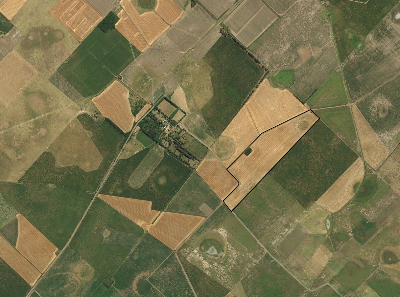

In [23]:
## veamos que hay en la imagen
im_frame

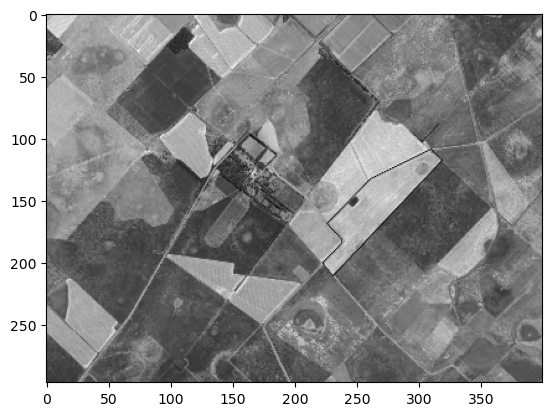

In [28]:
## miremos solo un canal
img = im_frame.getchannel(0)
plt.imshow(img,cmap="grey")

### Recorte de la imagen

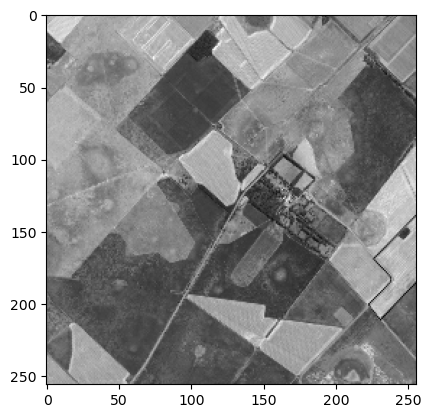

In [35]:
img = img.crop((0,0,256,256))
plt.imshow(img,cmap='grey');

### Operaciones puntuales (o pixel a pixel)

Para transformar una imagen RGB a escalas de grises, podemos aplicar alguna receta, por ejemplo, hacer la suma pesada de los 3 canales RGB según la formula:

$$
Y = 0.2125*R + 0.7154*G + 0.0721*B
$$

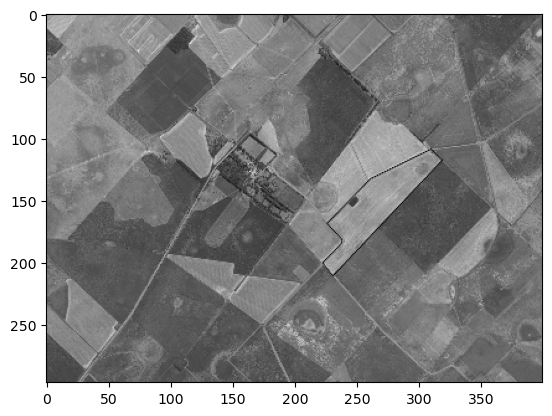

In [81]:
R = np.array(im_frame.getchannel(0))
G = np.array(im_frame.getchannel(1))
B = np.array(im_frame.getchannel(2))
Y = 0.2125*R + 0.7154*G + 0.0721*B
plt.imshow(Y,cmap='grey');

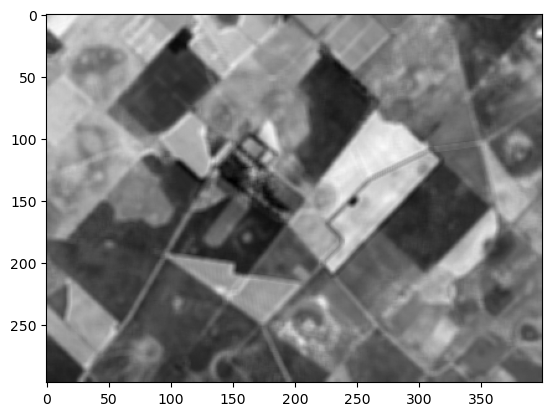

In [82]:
from skimage.morphology import footprint_rectangle
from skimage.filters import rank

footprint = footprint_rectangle((5,5))

img_filtrada = rank.mean(Y.astype(np.uint8), footprint=footprint)
plt.imshow(img_filtrada,cmap='grey');

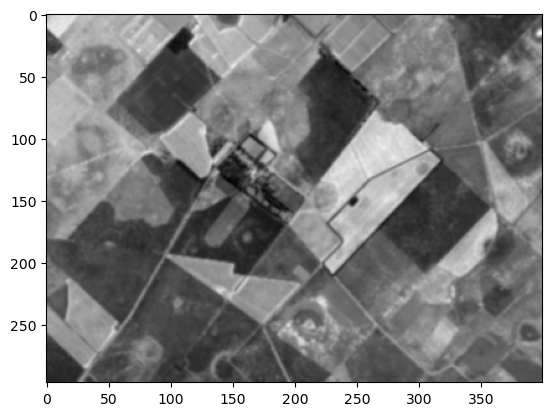

In [83]:
from skimage.filters import gaussian
img_filtrada = gaussian(Y)

plt.imshow(img_filtrada,cmap='grey');

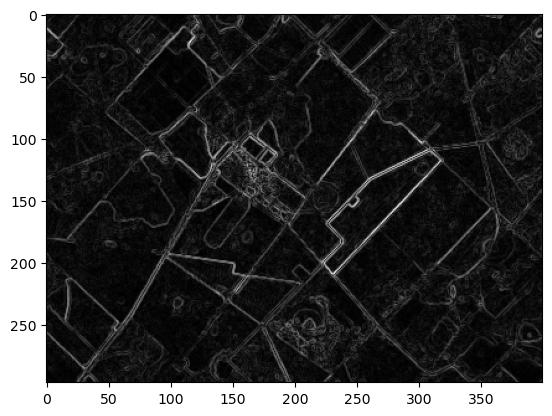

In [84]:
from skimage.filters import sobel

img_filtrada = sobel(Y)
plt.imshow(img_filtrada,cmap='grey');

## Qué sucede cuando la entrada tiene más de una capa?

![Redes Neuronales](images/filtro_3d.png)

## Algunas capas "especiales"

* **Dropout**: técnicas para evitar overfitting 

    Este es un truco de regularización que se utiliza para obligar a la red a distribuir la representación aprendida entre todas las neuronas. 

    El dropout "apaga" una fracción aleatoria preestablecida de las unidades en una capa, estableciendo sus valores en cero durante el entrenamiento. 

    Estas neuronas son aleatorias (diferentes para cada época), lo que obliga a la red a aprender una representación que funcionará incluso después del entrenamiento con del dropout desactivado.
    
* **Pooling**: se utilza para reducir la dimensionalidad espacial
    
    Se trata de un filtro sin pesos con el cual se convoluciona la capa de entrada tomando el máximo (*max pooling*) o el promedio (*average pooling*) de los pixeles dentro del filtro. 
    
    Permiten conservar la información importante, haciendo la red más robusta ante variaciones y ruido.
    
    Introduce un grado de invarianza ante traslaciones a la red, haciendo la red menos sensible a pequeños desplazamientos.

## Capas de salida - Activación softmax


<table>
<tr>
<td>

<img align="left" src="images/softmax.png" alt="Softmax" width="800" style="padding-left:0px">

</td>
<td>
   
Esta función se suele utilizar en modelos de predicción multiclase. 

Considerando una capa de salida con $n$ neuronas:

$$
f(\vec{z}) = \left( \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}},i=1..n\right)
$$

   
</td>
</tr>
</table>






## Algunos casos notables de redes convolucionales

![Redes Neuronales](images/chart.png)

## Ejercicio antes de la pausa

Consideremos un conjunto de imágenes RGB de tamaño 256x256 pixeles. 

Dada la siguiente red convolucional:

    - Capa 1: 8 filtros 3x3, stride=1, padding=1
    - Capa 2: Max Pooling 2x2, stride=2, padding=0
    - Capa 3: 4 filtros 3x3, stride=2, padding=1
    - Capa 4: Max Pooling 2x2, strid2=2, padding=0
    - Capa 5: Flatten (aplanado)
    - Capa 6: 512 neuronas
    - Capa 7: 256 neuronas
    - Capa Salida: 2 neuronas
    
Determinar la cantidad de parámetros a entrenar

### Calculando la cantidad de parámetros

Tamaño de las imágenes de entrada 3 x 256 x 256.

1) *Primera capa convolucional*
- \# filters 8
- Kernel size 3x3
- Padding 1
- Stride 1

        3 (canales) x 3x3 (filter size) x 8 (filtros) + 8 (bias) = 224 parámetros a entrenar
        Tamaño de la imágen de salida 8 x 256 x 256

2) *Primera capa de pooling
- Kernel size 2x2
- Stride 2
- Padding 0

        No tiene parámetros para entrenar
        Tamaño de la imagen de salida: 8 x 128 x 128

3) *Segunda capa convolucional*
- \# filters 4
- Kernel size 3x3
- Padding 1
- Stride 1

        8 (canales) x 3x3 (filter size) x 4 (filtros) + 4 (bias) = 292 parámetros a entrenar
        Tamaño de la imágen de salida 4 x 128 x 128

4) *Segunda capa de pooling*
- Kernel size 2x2
- Stride 2
- Padding 0

        No tiene parámetros para entrenar
        Tamaño de la imagen de salida: 4 x 64 x 64

5) *Capa Flatten*

        Tamaño del **vector** de salida 4 x 64 x 64 = 16384

6) *Primera capa fully connected*
- \# de neuronas 512

        16384 (entradas) x 512 (neuronas) + 512 (bias) = 8389120 parámetros a entrenar

7) *Segunda capa fully connected*
-\# de neuronas 256

        512 (entradas) x 256 (neuronas) + 256 (bias) = 131328 parámetros a entrenar

8) *Capa de salida*
-\# de neuronas 2

        256 (entradas) x 2 (neuronas) + 2 = 514 parámetros a entrenar

**Cantidad total de parámetros a entrenar**

        224 + 292 + 8389120 + 131328 + 514 = 8521478



## Pausa